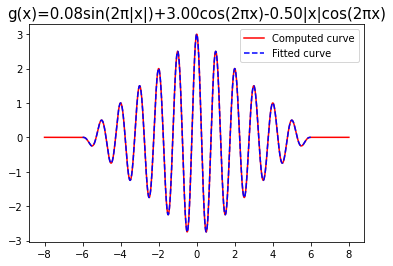

In [1]:
import numpy as np
from numpy import sin, cos, pi, exp
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

def s0(x):
    return np.array([sin(2*pi*i) if abs(i)<=3 else 0 for i in x])

def cross_correlation(x, c1, c2, c3):
    return c1*sin(2*pi*abs(x))+c2*cos(2*pi*x)+c3*abs(x)*cos(2*pi*x)

N=1000
y = np.linspace(-3,3,N)
dy = y[1] - y[0]
x = np.linspace(-8,8,N)
domain = np.where((x>=-6) & (x<=6))
acf = np.zeros(x.shape)
for i, value in enumerate(x):
    acf[i] = np.sum(s0(y[:-1]+dy/2)*s0(y[:-1]+dy/2+value)*dy)

c1, c2, c3 = 0, 0, 0
c1_fit, c2_fit, c3_fit = curve_fit(cross_correlation, x[domain], acf[domain], p0=[c1, c2, c3])[0]
p = '\u03C0'
plt.plot(x,acf, 'r', label='Computed curve')
plt.plot(x[domain],cross_correlation(x[domain], c1_fit, c2_fit, c3_fit), 'b--', label='Fitted curve')
plt.title(f'g(x)={c1_fit:.2f}sin(2{p}|x|)+{c2_fit:.2f}cos(2{p}x){c3_fit:.2f}|x|cos(2{p}x)', fontsize=15)
plt.legend()

Text(0.5, 1.0, 's∗r(x) with simga = 0.2')

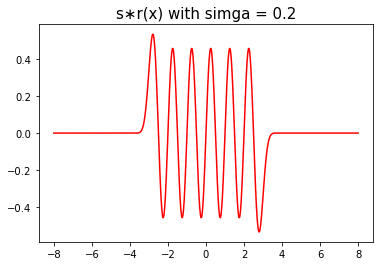

In [2]:
def p(x):
    return np.array([sin(20*pi*i) if abs(i)<=3 else 0 for i in x])

def s(x):
    return s0(x) + p(x)

def r(x, sigma):
    return 1/(2*pi*sigma**2)**(1/2)*exp(-x**2/(2*sigma**2))

sigma = 0.2
s_star_r = np.zeros(x.shape)
for i, value in enumerate(x):
    y = np.linspace(value-3*sigma,value+3*sigma,1000)
    dy = y[1] - y[0]
    s_star_r[i] = np.sum(s(y[:-1]+dy/2)*r(value-(y[:-1]+dy/2), sigma)*dy)
plt.plot(x, s_star_r, 'r')
plt.title('s\u2217r(x) with simga = 0.2', fontsize=15)

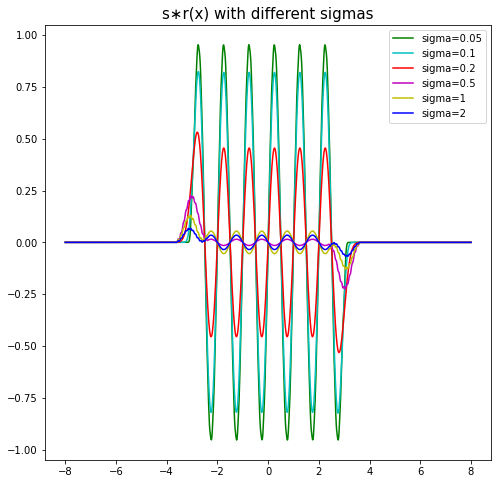

In [3]:
sigmas = [0.05, 0.1, 0.2, 0.5, 1, 2]
c = ['g','c','r','m','y','b']
plt.figure(figsize=(8,8))
for idx, si in enumerate(sigmas):
    s_star_r = np.zeros(x.shape)
    for i, value in enumerate(x):
        y = np.linspace(value-3*sigma,value+3*sigma,1000)
        dy = y[1] - y[0]
        s_star_r[i] = np.sum(s(y[:-1]+dy/2)*r(value-(y[:-1]+dy/2), si)*dy)
    plt.plot(x, s_star_r, color=c[idx], label=f'sigma={si}')
plt.title('s\u2217r(x) with different sigmas', fontsize=15)
plt.legend(loc=1)